This Is Debug Mode. Show Sample Image...

DATA No.0 is 9


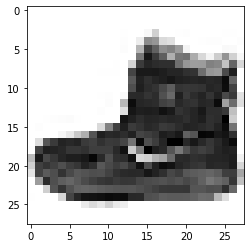

EPOCH: 1, TRAIN LOSS: 2.266, TEST LOSS: 2.214, TEST ACC: 33.220
EPOCH: 2, TRAIN LOSS: 2.208, TEST LOSS: 2.151, TEST ACC: 52.230
EPOCH: 3, TRAIN LOSS: 2.152, TEST LOSS: 2.101, TEST ACC: 60.590
EPOCH: 4, TRAIN LOSS: 2.107, TEST LOSS: 2.064, TEST ACC: 61.990
EPOCH: 5, TRAIN LOSS: 2.074, TEST LOSS: 2.037, TEST ACC: 62.120
EPOCH: 6, TRAIN LOSS: 2.048, TEST LOSS: 2.016, TEST ACC: 62.210
EPOCH: 7, TRAIN LOSS: 2.027, TEST LOSS: 2.000, TEST ACC: 62.340
EPOCH: 8, TRAIN LOSS: 2.011, TEST LOSS: 1.986, TEST ACC: 62.480
EPOCH: 9, TRAIN LOSS: 1.997, TEST LOSS: 1.975, TEST ACC: 62.500
EPOCH: 10, TRAIN LOSS: 1.985, TEST LOSS: 1.965, TEST ACC: 62.660
EPOCH: 11, TRAIN LOSS: 1.975, TEST LOSS: 1.957, TEST ACC: 62.680
EPOCH: 12, TRAIN LOSS: 1.967, TEST LOSS: 1.950, TEST ACC: 62.750
EPOCH: 13, TRAIN LOSS: 1.959, TEST LOSS: 1.944, TEST ACC: 62.810
EPOCH: 14, TRAIN LOSS: 1.952, TEST LOSS: 1.938, TEST ACC: 62.850
EPOCH: 15, TRAIN LOSS: 1.946, TEST LOSS: 1.933, TEST ACC: 62.860
EPOCH: 16, TRAIN LOSS: 1.941, TEST

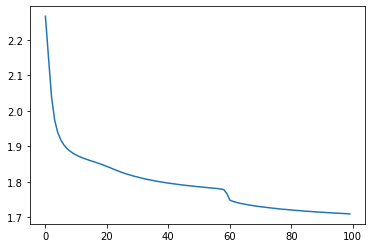

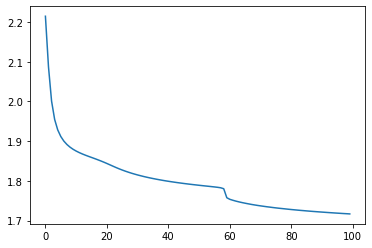

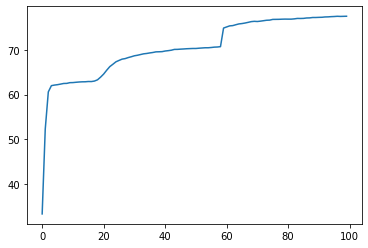

In [1]:
import torch.utils.data as data
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from torchvision import datasets, transforms

def softmax(x):
    mean = torch.mean(x, 1, keepdim=True)[0]
    x_exp = torch.exp(x-mean)
    x_exp_sum = torch.sum(x_exp, 1, keepdim=True)
    return x_exp/x_exp_sum


class SoftmaxRegression(torch.nn.Module):
    def __init__(self, input, output):
        super(SoftmaxRegression, self).__init__()
        self.linear = torch.nn.Linear(input, output)
        nn.init.normal_(self.linear.weight, 0.0, 0.01)

    def forward(self, x):
        x = self.linear(x)
        out = softmax(x)
        return out
    
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.view(784))
    ])

def mnist_learning(hidden_size=200, lr=0.01, batch_size=256, n_epoch=10, debug=True, fashion=True):
    # ----- MODEL SETTING -----
    model = SoftmaxRegression(28*28, 10)
    optimizer = optim.SGD(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.view(784))
    ])

    # ----- PREPROCESS -----
    # ----- MNIST -----
    if not fashion: 
        dataloader_train = torch.utils.data.DataLoader(
            datasets.MNIST('./data/mnist', train=True, download=True, transform=transform),
            batch_size=batch_size,
            shuffle=True
        )
        dataloader_test = torch.utils.data.DataLoader(
            datasets.MNIST('./data/mnist', train=False, download=True, transform=transform),
            shuffle=False
        )
    # ----- FASHION-MNIST -----
    elif fashion:
        dataloader_train = torch.utils.data.DataLoader(
            datasets.FashionMNIST('./data/fashion-mnist', train=True, download=True, transform=transform),
            batch_size=batch_size,
            shuffle=True
        )
        dataloader_test = torch.utils.data.DataLoader(
            datasets.FashionMNIST('./data/fashion-mnist', train=False, download=True, transform=transform),
            shuffle=False
        )

    # ----- SHOW SAMPLE IMAGE -----
    if debug:
        data_train_0 = dataloader_train.dataset[0]
        x_train_0 = data_train_0[0].numpy().reshape(28, 28)
        t_train_0 = data_train_0[1]
        print("This Is Debug Mode. Show Sample Image...\n")
        print("DATA No.0 is {}".format(t_train_0))
        plt.imshow(x_train_0, cmap=cm.Greys)
        plt.show();

    # ----- LEARNING -----
    loss_train_list = []
    loss_test_list = []
    acc_test_list = []
    for epoch in range(1, n_epoch+1):
        loss_train_batch_list = []
        loss_test_batch_list = []
        correct = 0
        total = 0

        # ----- TRAIN -----
        model.train()
        # ----- batch_sizeごとに処理 -----
        for x_train_batch, t_train_batch in dataloader_train:
            model.zero_grad() # 勾配の初期化
            y_train_batch = model.forward(x_train_batch)
            loss_train_batch = criterion(y_train_batch, t_train_batch)
            loss_train_batch.backward()
            optimizer.step()
            loss_train_batch_list.append(loss_train_batch.tolist())

        # ----- TEST -----
        model.eval()
        # ----- batch_sizeごとに処理 -----
        for x_test_batch, t_test_batch in dataloader_test:
            y_test_batch = model.forward(x_test_batch)
            loss_test_batch = criterion(y_test_batch, t_test_batch)
            loss_test_batch_list.append(loss_test_batch.tolist())

            label_test_batch = y_test_batch.argmax(1).numpy()
            t_test_batch = t_test_batch.numpy()
            correct += np.sum((label_test_batch - t_test_batch) == 0)
            total += 1

        loss_train_list.append(np.mean(loss_train_batch_list))
        loss_test_list.append(np.mean(loss_test_batch_list))
        acc_test_batch = 100 * correct / total
        acc_test_list.append(acc_test_batch)

        print('EPOCH: {}, TRAIN LOSS: {:.3f}, TEST LOSS: {:.3f}, TEST ACC: {:.3f}'.format(
            epoch,
            np.mean(loss_train_list),
            np.mean(loss_test_list),
            acc_test_batch
        ))

    # ----- PLOT -----
    plt.plot(loss_train_list)
    plt.show()
    plt.plot(loss_test_list)
    plt.show()
    plt.plot(acc_test_list)
    plt.show()

if __name__ == '__main__':
    #mnist_learning(n_epoch=100, lr=0.01)
    mnist_learning(fashion=True, n_epoch=100, lr=0.01)